<a href="https://colab.research.google.com/github/ponOlgap/OLga/blob/main/urfu_dl_fashion_mnist_prevent_overfitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ качества работы нейронной сети для распознавания моделей одежды в Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (Файл -> Создать копию на Диске). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://openedu.ru/course/urfu/PYDNN/)".

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [ ]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


Список с названиями классов

In [ ]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

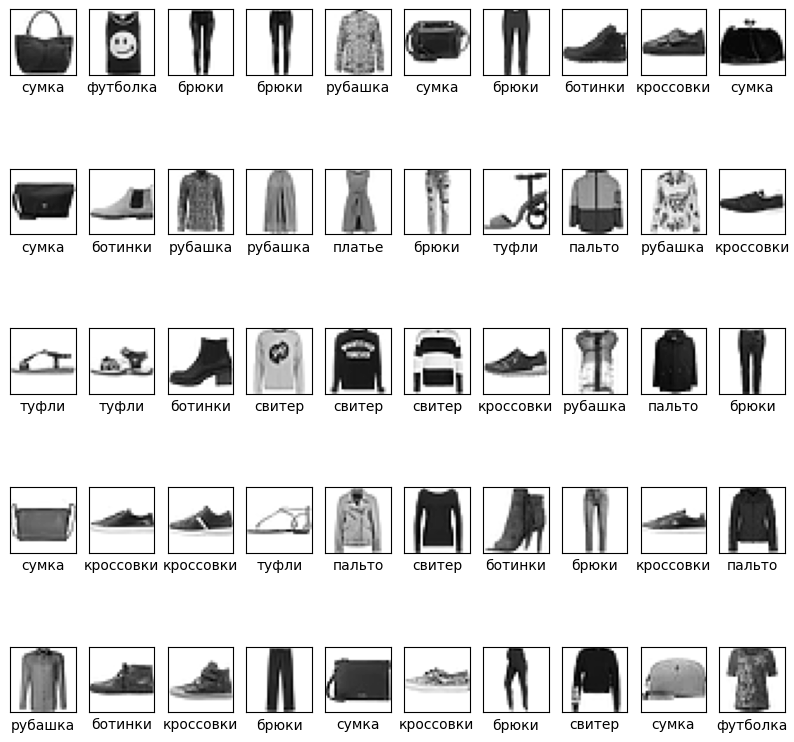

In [ ]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [ ]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255
x_test = x_test / 255

**Работа с правильными ответами**

In [ ]:
n = 4

In [ ]:
print(y_train[n])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**Преобразуем метки в формат one hot encoding**

In [ ]:
y_train = utils.to_categorical(y_train, 10)

In [ ]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [ ]:
print(y_train[n])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [ ]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
model.add(Dropout(0.2))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

**Компилируем сеть**

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 800)               628000    
                                                                 
 dropout (Dropout)           (None, 800)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                8010      
                                                                 
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=25,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/25
240/240 [==============================] - 4s 15ms/step - loss: 0.5526 - accuracy: 0.8056 - val_loss: 0.4391 - val_accuracy: 0.8433
Epoch 2/25
240/240 [==============================] - 3s 14ms/step - loss: 0.4042 - accuracy: 0.8551 - val_loss: 0.3839 - val_accuracy: 0.8642
Epoch 3/25
240/240 [==============================] - 4s 16ms/step - loss: 0.3613 - accuracy: 0.8696 - val_loss: 0.3597 - val_accuracy: 0.8705
Epoch 4/25
240/240 [==============================] - 3s 14ms/step - loss: 0.3310 - accuracy: 0.8802 - val_loss: 0.3480 - val_accuracy: 0.8742
Epoch 5/25
240/240 [==============================] - 3s 14ms/step - loss: 0.3175 - accuracy: 0.8845 - val_loss: 0.3244 - val_accuracy: 0.8827
Epoch 6/25
240/240 [==============================] - 4s 15ms/step - loss: 0.3028 - accuracy: 0.8885 - val_loss: 0.3166 - val_accuracy: 0.8860
Epoch 7/25
240/240 [==============================] - 4s 16ms/step - loss: 0.2865 - accuracy: 0.8956 - val_loss: 0.3284 - val_accuracy: 0.8796

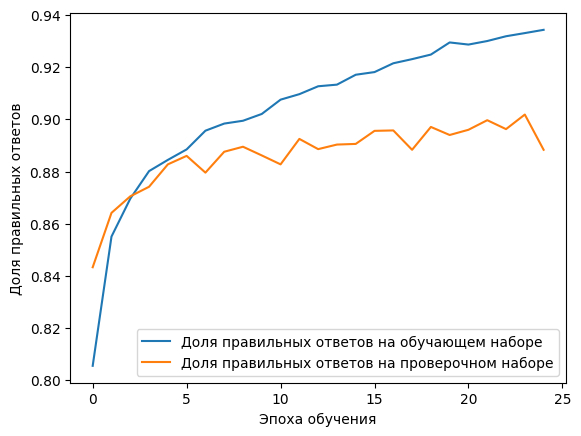

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля правильных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля правильных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

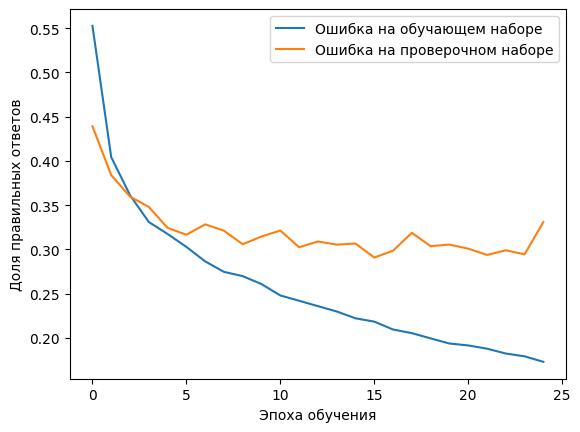

In [ ]:
plt.plot(history.history['loss'],
         label='Ошибка на обучающем наборе')
plt.plot(history.history['val_loss'],
         label='Ошибка на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля правильных ответов')
plt.legend()
plt.show()

## Сохраняем нейронную сеть для последующего использования

In [ ]:
model.save('fashion_mnist_dense.h5')

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [ ]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 [==============================] - 1s 2ms/step - loss: 0.3570 - accuracy: 0.8858


In [ ]:
print("Доля правильных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля правильных ответов на тестовых данных, в процентах: 88.58


## Используем сеть для распознавания предметов одежды

In [ ]:
n_rec = 67

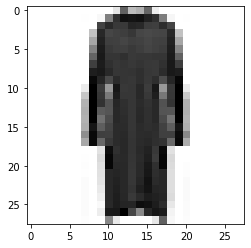

In [ ]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [ ]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [ ]:
prediction = model.predict(x)

1/1 [==============================] - 0s 81ms/step


**Печатаем результаты распознавания**

In [ ]:
prediction

array([[5.3362860e-06, 3.1041738e-04, 2.7992064e-04, 2.5106555e-01,
        7.4500459e-01, 7.5792137e-08, 3.2642875e-03, 3.5385162e-07,
        6.7912726e-05, 1.4968202e-06]], dtype=float32)

**Преобразуем результаты из формата one hot encoding**

In [ ]:
prediction = np.argmax(prediction[0])
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])


Номер класса: 4
Название класса: пальто


**Печатаем правильный ответ**

In [ ]:
label = np.argmax(y_test[n_rec])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 2
Название класса: свитер


## Идеи по изменению архитектуры нейронной сети

1. Попробуйте использовать разное количество нейронов на входном слое: 400, 600, 800, 1200.
2. Добавьте в нейронную сеть скрытый слой с разным количеством нейронов: 200, 300, 400, 600, 800.
3. Добавьте несколько скрытых слоев в сеть с разным количеством нейронов в каждом слое.
3. Используйте разное количество эпох: 10, 15, 20, 25, 30.
4. Используйте разные размеры мини-выборки (batch_size): 10, 50, 100, 200, 500.


Подберить разные комбинации гиперпараметров таким образом, чтобы получить лучший результат на тестовом наборе данных.

Убедитесь, что в вашей модели нет переобучения.